a simple Python code that allows the user to input two 3-dimensional vectors, calculates both the dot product and the cross product, and displays the results:

In [ ]:
import numpy as np

# Function to get a 3D vector input from the user in the form (x, y, z)
def get_vector_input(name):
    while True:
        try:
            # Ask the user for the vector input
            vector_str = input(f"Enter the components of {name} vector in the form (x, y, z): ")
            # Convert the input string to a tuple and then to a numpy array
            vector = tuple(map(float, vector_str.strip('()').split(',')))
            if len(vector) == 3:
                return np.array(vector)
            else:
                print("Error: Please enter exactly 3 components (x, y, z).")
        except ValueError:
            print("Error: Invalid input. Please enter numbers in the format (x, y, z).")

# Function to calculate the dot product
def dot_product(v1, v2):
    return np.dot(v1, v2)

# Function to calculate the cross product
def cross_product(v1, v2):
    return np.cross(v1, v2)

# Main program
if __name__ == "__main__":
    # Get vectors from the user
    vector1 = get_vector_input("first")
    vector2 = get_vector_input("second")

    # Calculate dot and cross products
    dot = dot_product(vector1, vector2)
    cross = cross_product(vector1, vector2)

    # Display results
    print("\nResults:")
    print(f"Dot Product: {dot}")
    print(f"Cross Product: {cross}")


Enter the components of first vector in the form (x, y, z):  3,4,5
Enter the components of second vector in the form (x, y, z):  1,2,3



Results:
First Vector (Cylindrical): r=5.00, θ=53.13°, z=5.00
Second Vector (Cylindrical): r=2.24, θ=63.43°, z=3.00
First Vector (Spherical): r=7.07, θ=45.00°, φ=53.13°
Second Vector (Spherical): r=3.74, θ=36.70°, φ=63.43°
Dot Product: 26.00
Cross Product: [ 2. -4.  2.]


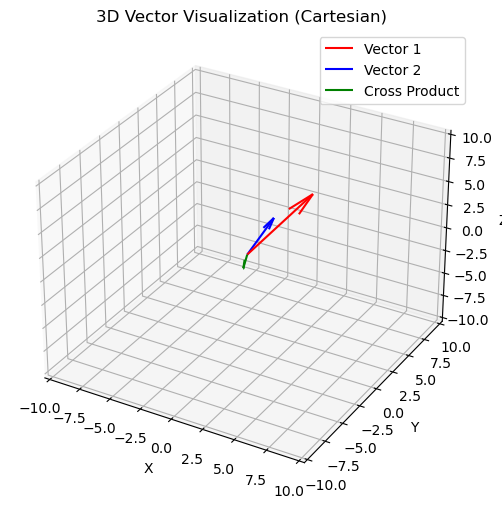

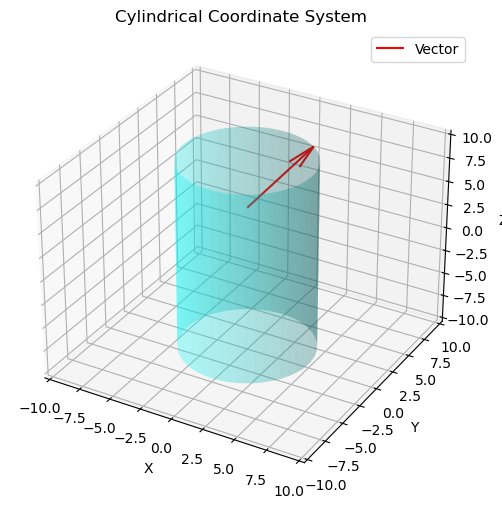

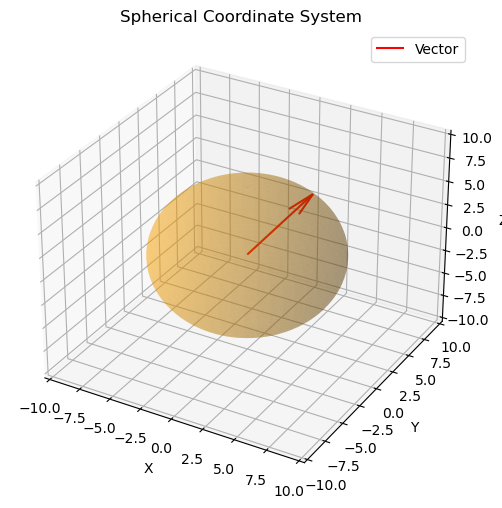

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to get a 3D vector input from the user in the form (x, y, z)
def get_vector_input(name):
    while True:
        try:
            # Ask the user for the vector input
            vector_str = input(f"Enter the components of {name} vector in the form (x, y, z): ")
            # Convert the input string to a tuple and then to a numpy array
            vector = tuple(map(float, vector_str.strip('()').split(',')))
            if len(vector) == 3:
                return np.array(vector)
            else:
                print("Error: Please enter exactly 3 components (x, y, z).")
        except ValueError:
            print("Error: Invalid input. Please enter numbers in the format (x, y, z).")

# Function to calculate the dot product
def dot_product(v1, v2):
    return np.dot(v1, v2)

# Function to calculate the cross product
def cross_product(v1, v2):
    return np.cross(v1, v2)

# Convert Cartesian to Cylindrical coordinates (r, θ [degrees], z)
def cartesian_to_cylindrical(x, y, z):
    r = np.sqrt(x**2 + y**2)  # Radial distance
    theta = np.degrees(np.arctan2(y, x))  # Azimuthal angle in degrees
    return r, theta, z

# Convert Cartesian to Spherical coordinates (r, θ [degrees], φ [degrees])
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)  # Radial distance
    theta = np.degrees(np.arccos(z / r)) if r != 0 else 0  # Polar angle in degrees
    phi = np.degrees(np.arctan2(y, x))  # Azimuthal angle in degrees
    return r, theta, phi

# Plot the vectors in 3D Cartesian coordinates
def plot_vectors(vector1, vector2, cross):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot vector 1 and vector 2
    ax.quiver(0, 0, 0, vector1[0], vector1[1], vector1[2], color='r', label='Vector 1')
    ax.quiver(0, 0, 0, vector2[0], vector2[1], vector2[2], color='b', label='Vector 2')
    ax.quiver(0, 0, 0, cross[0], cross[1], cross[2], color='g', label='Cross Product')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("3D Vector Visualization (Cartesian)")
    plt.show()

# Plot the cylindrical coordinates
def plot_cylindrical(r, theta, z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create the cylindrical surface (a simple 3D circle for visualization)
    theta_vals = np.linspace(0, 2 * np.pi, 100)
    z_vals = np.linspace(-10, 10, 100)
    theta_grid, z_grid = np.meshgrid(theta_vals, z_vals)
    x_cyl = r * np.cos(theta_grid)
    y_cyl = r * np.sin(theta_grid)

    ax.plot_surface(x_cyl, y_cyl, z_grid, alpha=0.3, color='cyan')

    # Plot the vector in cylindrical coordinates
    ax.quiver(0, 0, z, r * np.cos(np.radians(theta)), r * np.sin(np.radians(theta)), z, color='r', label='Vector')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("Cylindrical Coordinate System")
    plt.show()

# Plot the spherical coordinates
def plot_spherical(r, theta, phi):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere for visualization
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_sph = r * np.outer(np.cos(u), np.sin(v))
    y_sph = r * np.outer(np.sin(u), np.sin(v))
    z_sph = r * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x_sph, y_sph, z_sph, alpha=0.3, color='orange')

    # Plot the vector in spherical coordinates
    ax.quiver(0, 0, 0, r * np.sin(np.radians(theta)) * np.cos(np.radians(phi)),
              r * np.sin(np.radians(theta)) * np.sin(np.radians(phi)),
              r * np.cos(np.radians(theta)), color='r', label='Vector')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("Spherical Coordinate System")
    plt.show()

# Main program
if __name__ == "__main__":
    # Get vectors from the user
    vector1 = get_vector_input("first")
    vector2 = get_vector_input("second")

    # Calculate dot and cross products
    dot = dot_product(vector1, vector2)
    cross = cross_product(vector1, vector2)

    # Transform the vectors to cylindrical and spherical coordinates
    cylindrical1 = cartesian_to_cylindrical(*vector1)
    cylindrical2 = cartesian_to_cylindrical(*vector2)
    spherical1 = cartesian_to_spherical(*vector1)
    spherical2 = cartesian_to_spherical(*vector2)

    # Display results in a concise manner
    print("\nResults:")
    print(f"First Vector (Cylindrical): r={cylindrical1[0]:.2f}, θ={cylindrical1[1]:.2f}°, z={cylindrical1[2]:.2f}")
    print(f"Second Vector (Cylindrical): r={cylindrical2[0]:.2f}, θ={cylindrical2[1]:.2f}°, z={cylindrical2[2]:.2f}")
    print(f"First Vector (Spherical): r={spherical1[0]:.2f}, θ={spherical1[1]:.2f}°, φ={spherical1[2]:.2f}°")
    print(f"Second Vector (Spherical): r={spherical2[0]:.2f}, θ={spherical2[1]:.2f}°, φ={spherical2[2]:.2f}°")
    print(f"Dot Product: {dot:.2f}")
    print(f"Cross Product: {cross}")

    # Plot the results
    plot_vectors(vector1, vector2, cross)
    plot_cylindrical(*cylindrical1)
    plot_spherical(*spherical1)


How it works:
1-Vector Input: The program prompts the user to input the components of two 3D vectors (x, y, z).
2-Dot Product: The dot product is calculated using np.dot(v1, v2).
3-Cross Product: The cross product is calculated using np.cross(v1, v2).
4-Display Results: The results for both the dot product and the cross product are displayed.

Enter the components of first vector in the form (x, y, z):  3,4,5
Enter the components of second vector in the form (x, y, z):  1,2,3



Results:
First Vector (Cylindrical): r=5.00, θ=53.13°, z=5.00
Second Vector (Cylindrical): r=2.24, θ=63.43°, z=3.00
First Vector (Spherical): r=7.07, θ=45.00°, φ=53.13°
Second Vector (Spherical): r=3.74, θ=36.70°, φ=63.43°
Dot Product: 26.00
Cross Product: [ 2. -4.  2.]


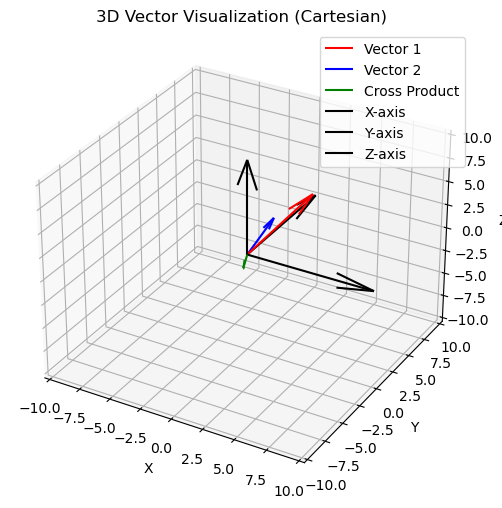

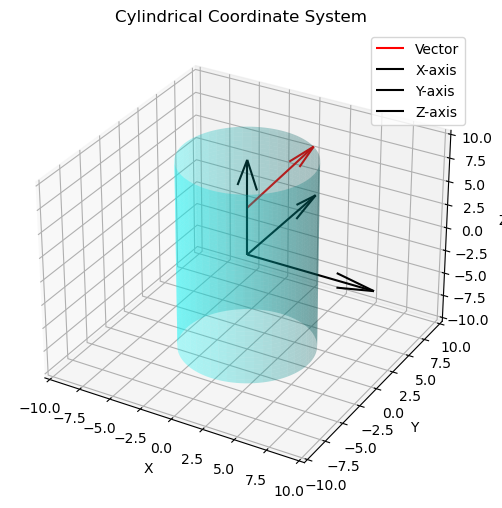

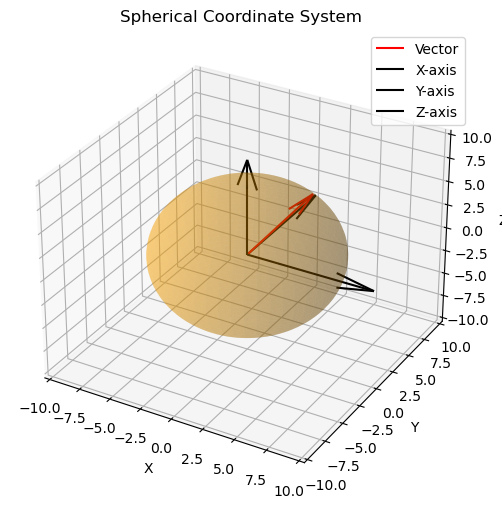

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to get a 3D vector input from the user in the form (x, y, z)
def get_vector_input(name):
    while True:
        try:
            # Ask the user for the vector input
            vector_str = input(f"Enter the components of {name} vector in the form (x, y, z): ")
            # Convert the input string to a tuple and then to a numpy array
            vector = tuple(map(float, vector_str.strip('()').split(',')))
            if len(vector) == 3:
                return np.array(vector)
            else:
                print("Error: Please enter exactly 3 components (x, y, z).")
        except ValueError:
            print("Error: Invalid input. Please enter numbers in the format (x, y, z).")

# Function to calculate the dot product
def dot_product(v1, v2):
    return np.dot(v1, v2)

# Function to calculate the cross product
def cross_product(v1, v2):
    return np.cross(v1, v2)

# Convert Cartesian to Cylindrical coordinates (r, θ [degrees], z)
def cartesian_to_cylindrical(x, y, z):
    r = np.sqrt(x**2 + y**2)  # Radial distance
    theta = np.degrees(np.arctan2(y, x))  # Azimuthal angle in degrees
    return r, theta, z

# Convert Cartesian to Spherical coordinates (r, θ [degrees], φ [degrees])
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)  # Radial distance
    theta = np.degrees(np.arccos(z / r)) if r != 0 else 0  # Polar angle in degrees
    phi = np.degrees(np.arctan2(y, x))  # Azimuthal angle in degrees
    return r, theta, phi

# Plot the vectors in 3D Cartesian coordinates
def plot_vectors(vector1, vector2, cross):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot vector 1 and vector 2
    ax.quiver(0, 0, 0, vector1[0], vector1[1], vector1[2], color='r', label='Vector 1')
    ax.quiver(0, 0, 0, vector2[0], vector2[1], vector2[2], color='b', label='Vector 2')
    ax.quiver(0, 0, 0, cross[0], cross[1], cross[2], color='g', label='Cross Product')

    # Draw x, y, z axes
    ax.quiver(0, 0, 0, 10, 0, 0, color='k', label='X-axis')
    ax.quiver(0, 0, 0, 0, 10, 0, color='k', label='Y-axis')
    ax.quiver(0, 0, 0, 0, 0, 10, color='k', label='Z-axis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("3D Vector Visualization (Cartesian)")
    plt.show()

# Plot the cylindrical coordinates
def plot_cylindrical(r, theta, z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create the cylindrical surface (a simple 3D circle for visualization)
    theta_vals = np.linspace(0, 2 * np.pi, 100)
    z_vals = np.linspace(-10, 10, 100)
    theta_grid, z_grid = np.meshgrid(theta_vals, z_vals)
    x_cyl = r * np.cos(theta_grid)
    y_cyl = r * np.sin(theta_grid)

    ax.plot_surface(x_cyl, y_cyl, z_grid, alpha=0.3, color='cyan')

    # Plot the vector in cylindrical coordinates
    ax.quiver(0, 0, z, r * np.cos(np.radians(theta)), r * np.sin(np.radians(theta)), z, color='r', label='Vector')

    # Draw x, y, z axes
    ax.quiver(0, 0, 0, 10, 0, 0, color='k', label='X-axis')
    ax.quiver(0, 0, 0, 0, 10, 0, color='k', label='Y-axis')
    ax.quiver(0, 0, 0, 0, 0, 10, color='k', label='Z-axis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("Cylindrical Coordinate System")
    plt.show()

# Plot the spherical coordinates
def plot_spherical(r, theta, phi):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere for visualization
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_sph = r * np.outer(np.cos(u), np.sin(v))
    y_sph = r * np.outer(np.sin(u), np.sin(v))
    z_sph = r * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x_sph, y_sph, z_sph, alpha=0.3, color='orange')

    # Plot the vector in spherical coordinates
    ax.quiver(0, 0, 0, r * np.sin(np.radians(theta)) * np.cos(np.radians(phi)),
              r * np.sin(np.radians(theta)) * np.sin(np.radians(phi)),
              r * np.cos(np.radians(theta)), color='r', label='Vector')

    # Draw x, y, z axes
    ax.quiver(0, 0, 0, 10, 0, 0, color='k', label='X-axis')
    ax.quiver(0, 0, 0, 0, 10, 0, color='k', label='Y-axis')
    ax.quiver(0, 0, 0, 0, 0, 10, color='k', label='Z-axis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.legend()
    plt.title("Spherical Coordinate System")
    plt.show()

# Main program
if __name__ == "__main__":
    # Get vectors from the user
    vector1 = get_vector_input("first")
    vector2 = get_vector_input("second")

    # Calculate dot and cross products
    dot = dot_product(vector1, vector2)
    cross = cross_product(vector1, vector2)

    # Transform the vectors to cylindrical and spherical coordinates
    cylindrical1 = cartesian_to_cylindrical(*vector1)
    cylindrical2 = cartesian_to_cylindrical(*vector2)
    spherical1 = cartesian_to_spherical(*vector1)
    spherical2 = cartesian_to_spherical(*vector2)

    # Display results in a concise manner
    print("\nResults:")
    print(f"First Vector (Cylindrical): r={cylindrical1[0]:.2f}, θ={cylindrical1[1]:.2f}°, z={cylindrical1[2]:.2f}")
    print(f"Second Vector (Cylindrical): r={cylindrical2[0]:.2f}, θ={cylindrical2[1]:.2f}°, z={cylindrical2[2]:.2f}")
    print(f"First Vector (Spherical): r={spherical1[0]:.2f}, θ={spherical1[1]:.2f}°, φ={spherical1[2]:.2f}°")
    print(f"Second Vector (Spherical): r={spherical2[0]:.2f}, θ={spherical2[1]:.2f}°, φ={spherical2[2]:.2f}°")
    print(f"Dot Product: {dot:.2f}")
    print(f"Cross Product: {cross}")

    # Plot the results
    plot_vectors(vector1, vector2, cross)
    plot_cylindrical(*cylindrical1)
    plot_spherical(*spherical1)
